In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import hdbscan
import seaborn as sns
sns.set_style("dark")

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Load _All_ Data

In [2]:
all_data = pd.DataFrame()
for yr in range(1996,2014):
    data = pd.read_csv('data/college-scorecard-raw-data-030216/merged_'+str(yr)+'_PP.csv', encoding='iso-8859-1',
                       na_values="PrivacySuppressed")
    data['year'] = yr
    all_data = pd.concat((all_data,data))
all_data.info()

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 1730 entries, UNITID to year
dtypes: float64(1713), int64(7), object(10)
memory usage: 1.6+ GB


In [3]:
all_data.set_index('UNITID', inplace=True)

In [4]:
yearly = all_data.groupby("year")
nans = ~pd.isnull(yearly.get_group(2013))
count = nans.astype(int)
for yr in range(2012,1995,-1):
    nans = ~pd.isnull(yearly.get_group(yr))
    count = count.add(nans.astype(int), fill_value=0)

In [5]:
count.head()

,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,year
UNITID,,,,,,,,,,,,,,,,,,,,,
100636,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100654,18.0,18.0,18.0,18.0,18.0,18.0,1.0,1.0,1.0,15.0,...,5.0,5.0,5.0,5.0,5.0,0.0,1.0,0.0,1.0,18.0
100663,18.0,18.0,18.0,18.0,18.0,18.0,1.0,1.0,1.0,15.0,...,5.0,5.0,5.0,5.0,5.0,0.0,1.0,0.0,1.0,18.0
100672,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100690,18.0,18.0,18.0,18.0,18.0,18.0,1.0,1.0,1.0,15.0,...,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,18.0


In [6]:
count[count.ZIP <18].head(30)

,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,year
UNITID,,,,,,,,,,,,,,,,,,,,,
100636,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100672,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100919,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
100964,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100973,6.0,6.0,6.0,6.0,6.0,6.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
101019,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101037,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
101107,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
101198,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [7]:
all_data.loc[count[count.ZIP <18].index].head(30)

,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,year
UNITID,,,,,,,,,,,,,,,,,,,,,
100636,01230800,12308,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,AL,361126613,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
100636,01230800,12308,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,AL,361126613,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
100672,00574900,5749,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
100672,00574900,5749,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
100919,00570400,5704,BESSEMER STATE TECHNICAL COLLEGE,BESSEMER,AL,35021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
100919,00570400,5704,BESSEMER STATE TECHNICAL COLLEGE,BESSEMER,AL,35021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
100919,00570400,5704,BESSEMER STATE TECHNICAL COLLEGE,BESSEMER,AL,35021,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
100919,00570400,5704,BESSEMER STATE TECHNICAL COLLEGE,BESSEMER,AL,35021,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999
100919,00570400,5704,BESSEMER STATE TECHNICAL COLLEGE,BESSEMER,AL,35022,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000


<IPython.core.display.Javascript object>


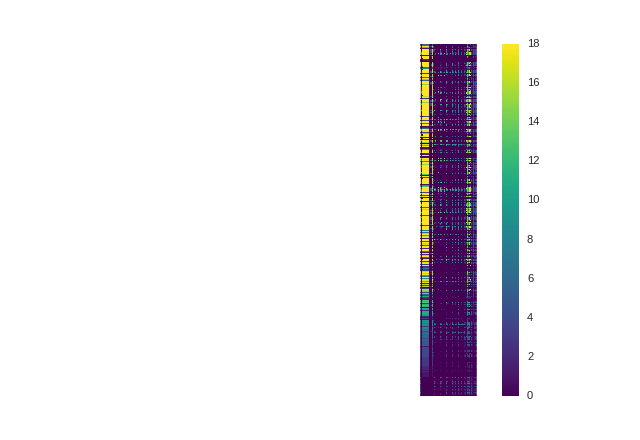

In [22]:
f, ax = plt.subplots()
im = ax.imshow(count.values, cmap=plt.cm.viridis, interpolation='none')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
#f.colorbar(im, cax=plt.gca())
plt.colorbar(im)

In [11]:
entry_year = (~yearly.get_group(2013).isnull()).astype(int)
entry_year[entry_year==1] = 2013 - 1995
for yr in range(2012,1995,-1):
    df = (~yearly.get_group(yr).isnull()).astype(int)
    df[df==1] = yr - 1995
    entry_year = entry_year.replace(0,np.nan).combine_first(df).fillna(0)

In [12]:
entry_year.describe()

,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,year
count,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,...,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000,10707.000000
mean,15.353507,15.353507,15.353507,15.353507,15.353507,15.353507,12.727935,12.976744,12.126086,14.009620,...,10.045484,11.065191,9.380032,10.584851,10.549827,6.492575,3.987672,6.158027,3.369011,15.353507
std,5.155376,5.155376,5.155376,5.155376,5.155376,5.155376,8.191994,8.074131,8.440038,5.627868,...,8.835995,8.659707,8.905835,8.757072,8.770387,8.644061,7.475412,8.539907,7.021151,5.155376
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,0.000000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000,...,18.000000,18.000000,16.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,0.000000,18.000000,0.000000,18.000000
max,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000


<IPython.core.display.Javascript object>


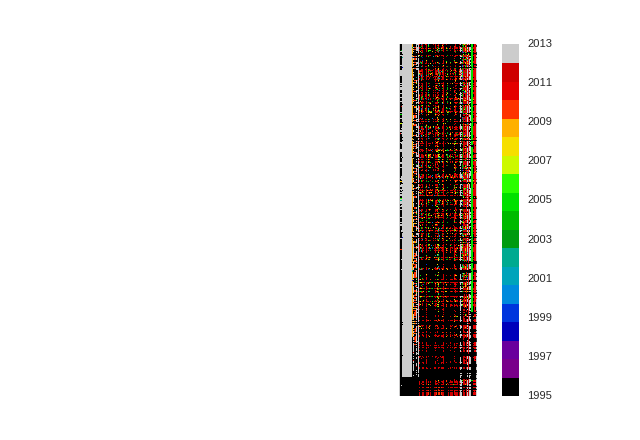

In [15]:
f, ax = plt.subplots()
im = ax.imshow(entry_year[entry_year.OPEID == 18].values,
               cmap=plt.cm.get_cmap('nipy_spectral', 19),
               interpolation='none')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
#f.colorbar(im, cax=plt.gca())
#im.set_clim(16,18)
formatter = plt.FuncFormatter(lambda val, loc: int(val+1995))
plt.colorbar(im, format=formatter)